
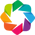

In [1]:
import ReadIM
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import holoviews as hv
import bokeh
hv.extension('bokeh')
from holoviews.plotting.bokeh.element import (line_properties, fill_properties,
                                              text_properties)

In [2]:
vbuff, vatts   =  ReadIM.extra.get_Buffer_andAttributeList('B00001.vc7')
v_array, vbuff = ReadIM.extra.buffer_as_array(vbuff)
v_atts = ReadIM.extra.att2dict(vatts)

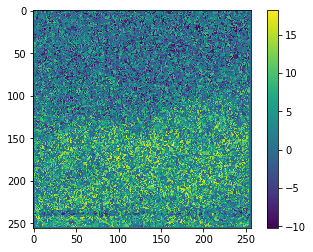

In [3]:
s_vec = np.shape(v_array)
plt.imshow(v_array[15,:,:])
plt.colorbar()
plt.show()

In [4]:
sample_array = v_array[1,:,:]
sample_array.shape

(256, 256)

In [5]:
x_df = np.linspace(0,255,256)
y_df = np.tile(x_df,256)
x_df = np.repeat(x_df,256)

In [6]:
v_df = []
for i in range(0,256):
    for j in range(0,256):
        v_df.append(sample_array[i,j])

In [7]:
d = {'x': x_df, 'y': y_df, 'Velocity': v_df}
index = np.linspace(0,65535,65536)
df = pd.DataFrame(data = d, index = index)

In [8]:
table = hv.Table(df)
table

:Table   [Velocity,x,y]

In [9]:
%%opts HeatMap (cmap='Spectral') [tools=['hover','crosshair'] colorbar=True toolbar='left' xaxis=None yaxis=None title_format='Velocity']
%%output filename="holoviews" fig="html"
table.to.heatmap(kdims=['x', 'y'], vdims='Velocity')

:HeatMap   [x,y]   (Velocity)

In [132]:
%%output?
